# Processing Shakespeare

Counting all the letters in Shakespeares' works!

First step: read each line of text file into a list of strings.

With the file name below preceded by a "./", that syntax is there to tell the computer to look the the current directory for that file with a specific name.


In [5]:
from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Read a text file into a list of strings for each line."""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r")

    for line in file_handle:
        line = line.strip()
        line = line.lower()
        lines.append(line)


    return lines

shakespeares_lines: list[str] = read_lines("./shakespeare.txt")
print(len(shakespeares_lines))

124192


In [6]:
# Example of "Slice Notation"

print(shakespeares_lines[0:5])

['1609', '', 'the sonnets', '', 'by william shakespeare']


The next step of our analysis is to count all of the letters in Shakespeare's complete body of work.

In [7]:
def tally(letter: dict[str, int], key: str) -> None:
    """Mutate letter by incrementing value stored at key by 1."""
    if key in letter:
        letter[key] += 1
    else:
        letter[key] = 1

def count_letters(lines: list[str]) -> dict[str, int]:
    """Count the frequency of all letters in a list of strings. "isalpha" is also there to make sure that only the alphebetical data is processed 
    (instead of things like symbols)."""
    count: dict[str, int] = {}
    
    for line in lines:
        for char in line:
            if char.isalpha():
                tally(count, char)

    return count

shakespeares_counts: dict[str, int] = count_letters(shakespeares_lines)
print(shakespeares_counts)

{'t': 328986, 'h': 236583, 'e': 446145, 's': 248518, 'o': 313890, 'n': 242750, 'b': 61788, 'y': 94173, 'w': 89286, 'i': 253329, 'l': 169657, 'a': 288594, 'm': 111219, 'k': 35362, 'p': 58249, 'r': 237250, 'f': 80333, 'c': 87839, 'u': 128697, 'd': 149126, 'g': 68054, 'v': 37497, 'z': 1626, 'x': 5217, 'q': 3577, 'j': 4752}


Visualize with a bar char this data about character frequencies.

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


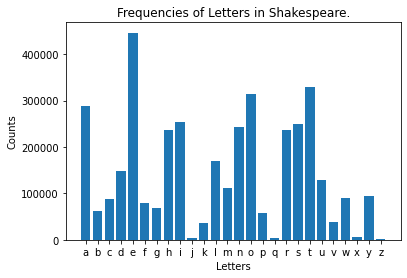

In [8]:
from matplotlib import pyplot

shakespeares_counts = dict(sorted(shakespeares_counts.items()))

pyplot.title("Frequencies of Letters in Shakespeare.")
pyplot.xlabel("Letters")
pyplot.ylabel("Counts")

labels: list[str] = list (shakespeares_counts.keys())
values: list[int] = list(shakespeares_counts.values())

pyplot.bar(labels, values)

print(labels)